--- 
# Phase 1: Understanding Burnout

Burnout is when employee feel exhausted all the time (like a phone batter at 1%). It causes:
- Less productivity of the work done.
- Absentissim of workers at workplace 
- Low income generated by the company. 

Why Predict Burnout? 
- Identifying burnout early helps to prevent a deep hole in the company
- Keep team happy and productive. 

---
# Phase 2: Perform Exploratory Data Analysis (EDA)
- Gain insights into the dataset which will helps in determining the machine learning model to solve the problem


- ## Import necessary libraries and load the dataset

In [1]:
# import the libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as  plt 
import seaborn as sns 


In [2]:
# Load the dataset 
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv") 

df_train.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [15]:
# check for the shape of the train and test data
print(f"The shape of train data: {df_train.shape}\n",
      "The shape of test data:", (df_test.shape))

The shape of train data: (22750, 9)
 The shape of test data: (12250, 8)


In [41]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           22750 non-null  object 
 1   date_of_joining       22750 non-null  object 
 2   gender                22750 non-null  object 
 3   company_type          22750 non-null  object 
 4   wfh_setup_available   22750 non-null  object 
 5   designation           22750 non-null  float64
 6   resource_allocation   21369 non-null  float64
 7   mental_fatigue_score  20633 non-null  float64
 8   burn_rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


## The train data contains 9 columns

In [42]:
# Get info of test data
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12250 entries, 0 to 12249
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           12250 non-null  object 
 1   date_of_joining       12250 non-null  object 
 2   gender                12250 non-null  object 
 3   company_type          12250 non-null  object 
 4   wfh_setup_available   12250 non-null  object 
 5   designation           12250 non-null  float64
 6   resource_allocation   12250 non-null  float64
 7   mental_fatigue_score  12250 non-null  float64
dtypes: float64(3), object(5)
memory usage: 765.8+ KB


## The test data contains 8 columns

In [37]:
# change all the columns of train data into lower cases 
df_train.columns = df_train.columns.str.replace(" ", "_").str.lower()
df_train.columns 

Index(['employee_id', 'date_of_joining', 'gender', 'company_type',
       'wfh_setup_available', 'designation', 'resource_allocation',
       'mental_fatigue_score', 'burn_rate'],
      dtype='object')

In [38]:
# change all the columns of test data into lower cases 
df_test.columns = df_test.columns.str.replace(" ", "_").str.lower()
df_test.columns

Index(['employee_id', 'date_of_joining', 'gender', 'company_type',
       'wfh_setup_available', 'designation', 'resource_allocation',
       'mental_fatigue_score'],
      dtype='object')

In [39]:
# Get the columns in the data
d = df_train.dtypes
d  

employee_id              object
date_of_joining          object
gender                   object
company_type             object
wfh_setup_available      object
designation             float64
resource_allocation     float64
mental_fatigue_score    float64
burn_rate               float64
dtype: object

In [40]:
# Check for categorical data
d == "object" 


employee_id              True
date_of_joining          True
gender                   True
company_type             True
wfh_setup_available      True
designation             False
resource_allocation     False
mental_fatigue_score    False
burn_rate               False
dtype: bool

In [62]:
df_train.describe()

,date_of_joining,designation,resource_allocation,mental_fatigue_score,burn_rate,tenure
count,22750,22750.000000,22750.000000,22750.000000,22750.000000,22750.000000
mean,2008-07-01 09:28:05.274725120,2.178725,4.452176,5.744176,0.451906,16.583033
min,2008-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000,16.000000
25%,2008-04-01 00:00:00,1.000000,3.000000,4.700000,0.320000,16.000000
50%,2008-07-02 00:00:00,2.000000,4.000000,5.900000,0.450000,17.000000
75%,2008-09-30 00:00:00,3.000000,6.000000,6.900000,0.580000,17.000000
max,2008-12-31 00:00:00,5.000000,10.000000,10.000000,1.000000,17.000000
std,NaN,1.135145,1.987427,1.829962,0.193268,0.493068


## Check for missing values for train data

In [43]:
df_train.isna().sum()

employee_id                0
date_of_joining            0
gender                     0
company_type               0
wfh_setup_available        0
designation                0
resource_allocation     1381
mental_fatigue_score    2117
burn_rate               1124
dtype: int64

* *Replace the missing categorical data with mode and numerical data with median*

In [45]:
# for col in df == 'object' :
#     df[col] = df[col].fillna(df[col].mode()[0])
    
for col in ['resource_allocation', 'mental_fatigue_score', 'burn_rate']:
    df_train[col] = df_train[col].fillna(df_train[col].median()) 

In [46]:
df_train.isna().sum()

employee_id             0
date_of_joining         0
gender                  0
company_type            0
wfh_setup_available     0
designation             0
resource_allocation     0
mental_fatigue_score    0
burn_rate               0
dtype: int64

## Check for missing values in the test data


In [47]:
df_test.isna().sum()

employee_id             0
date_of_joining         0
gender                  0
company_type            0
wfh_setup_available     0
designation             0
resource_allocation     0
mental_fatigue_score    0
dtype: int64

## Hence, the missing values is sorted out from the train data. 

## Check for outliers

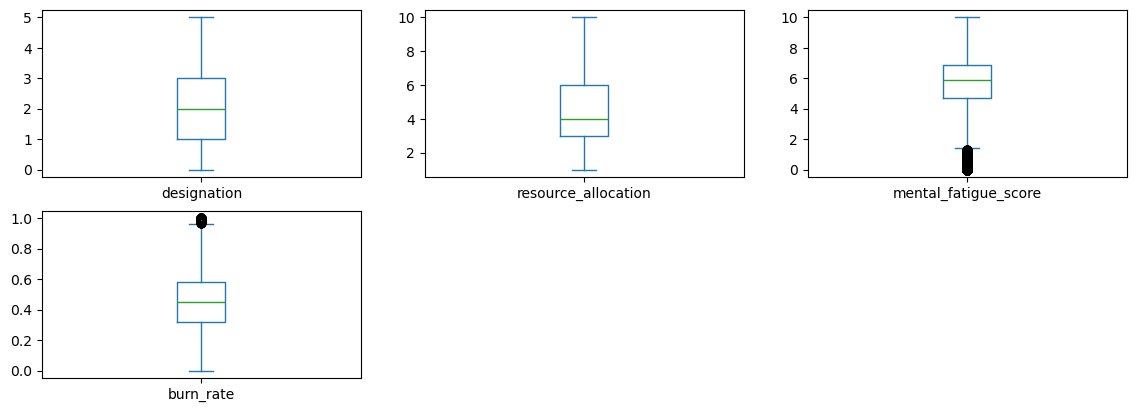

In [48]:
df_train.plot(kind='box', layout=(4,3), figsize=(14, 10), subplots=True)
plt.show() 

In [ ]:
q1 =  'mental_fatigue_score'

In [67]:
#step 1- find the Q1 and Q3
Q1 = df_train['burn_rate'].quantile(0.25)
Q3 = df_train['burn_rate'].quantile(0.75)


IQR = Q3-Q1
IQR

#step 3 - find the lower limit
lower_limit = Q1 - 1.5*IQR

#step 4 - find the upper limit
upper_limit = Q3 + 1.5*IQR

lower_limit, upper_limit
df_train[(df_train.burn_rate<lower_limit) | (df_train.burn_rate>upper_limit)] 

new_df_train = df_train[(df_train.burn_rate>lower_limit) & (df_train.burn_rate<upper_limit)]

new_df_train.head()

,employee_id,date_of_joining,gender,company_type,wfh_setup_available,designation,resource_allocation,mental_fatigue_score,burn_rate,tenure
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16,16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36,16
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,4.0,5.8,0.49,17
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20,16
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52,17


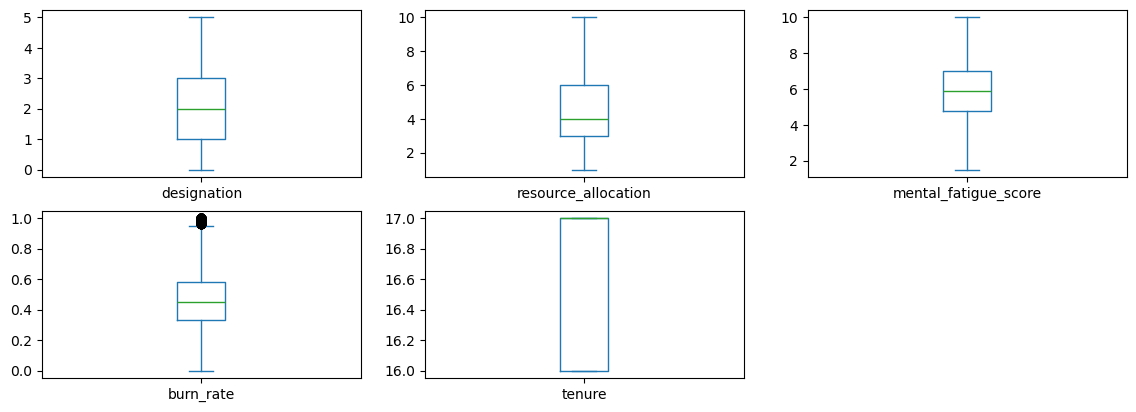

In [74]:
new_df_train.plot(kind='box', layout=(4,3), figsize=(14, 10), subplots=True)
plt.show() 

In [72]:
#step 1- find the Q1 and Q3
q1 = df_train['mental_fatigue_score'].quantile(0.25)
q3 = df_train['mental_fatigue_score'].quantile(0.75)


iqr = q3 - q1
iqr

#step 3 - find the lower limit
lower_limit = q1 - 1.5*iqr

#step 4 - find the upper limit
upper_limit = q3 + 1.5*iqr

lower_limit, upper_limit
df_train[(df_train.mental_fatigue_score<lower_limit) | (df_train.mental_fatigue_score>upper_limit)] 

new_df_train = df_train[(df_train.mental_fatigue_score>lower_limit) & (df_train.mental_fatigue_score<upper_limit)]

new_df_train.head() 

,employee_id,date_of_joining,gender,company_type,wfh_setup_available,designation,resource_allocation,mental_fatigue_score,burn_rate,tenure
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16,16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36,16
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,4.0,5.8,0.49,17
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20,16
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52,17


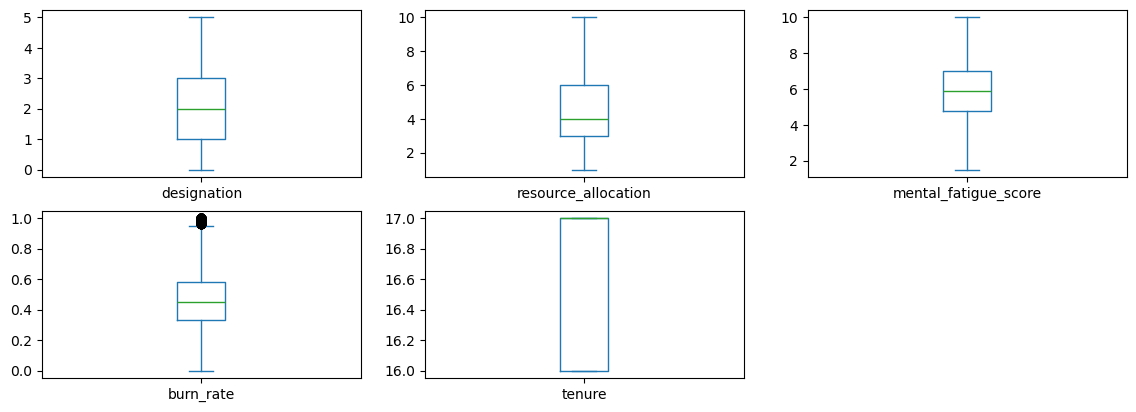

In [73]:
new_df_train.plot(kind='box', layout=(4,3), figsize=(14, 10), subplots=True)
plt.show()

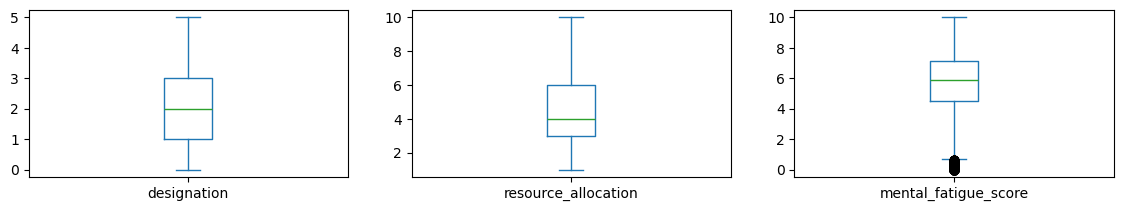

In [49]:
df_test.plot(kind='box', layout=(4,3), figsize=(14, 10), subplots=True)
plt.show() 

In [75]:
df_train = new_df_train
df_train.head()

,employee_id,date_of_joining,gender,company_type,wfh_setup_available,designation,resource_allocation,mental_fatigue_score,burn_rate,tenure
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16,16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36,16
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,4.0,5.8,0.49,17
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20,16
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52,17


## Phase 2: Perform Exploratory Data Analysis (EDA)


- 1. Univariate Analysis

In [76]:
df_train['date_of_joining'] = pd.to_datetime(df_train['date_of_joining'])
df_train['tenure'] = (pd.Timestamp.today() - df_train['date_of_joining']).dt.days // 365 

C:\Users\USER\AppData\Local\Temp\ipykernel_13852\1723509054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['date_of_joining'] = pd.to_datetime(df_train['date_of_joining'])
C:\Users\USER\AppData\Local\Temp\ipykernel_13852\1723509054.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['tenure'] = (pd.Timestamp.today() - df_train['date_of_joining']).dt.days // 365


C:\Users\USER\AppData\Local\Temp\ipykernel_13852\2556777803.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_train['resource_allocation'], ax=axes[0,2], palette='viridis')
C:\Users\USER\AppData\Local\Temp\ipykernel_13852\2556777803.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_train['gender'], ax=axes[1,2], palette='pastel')


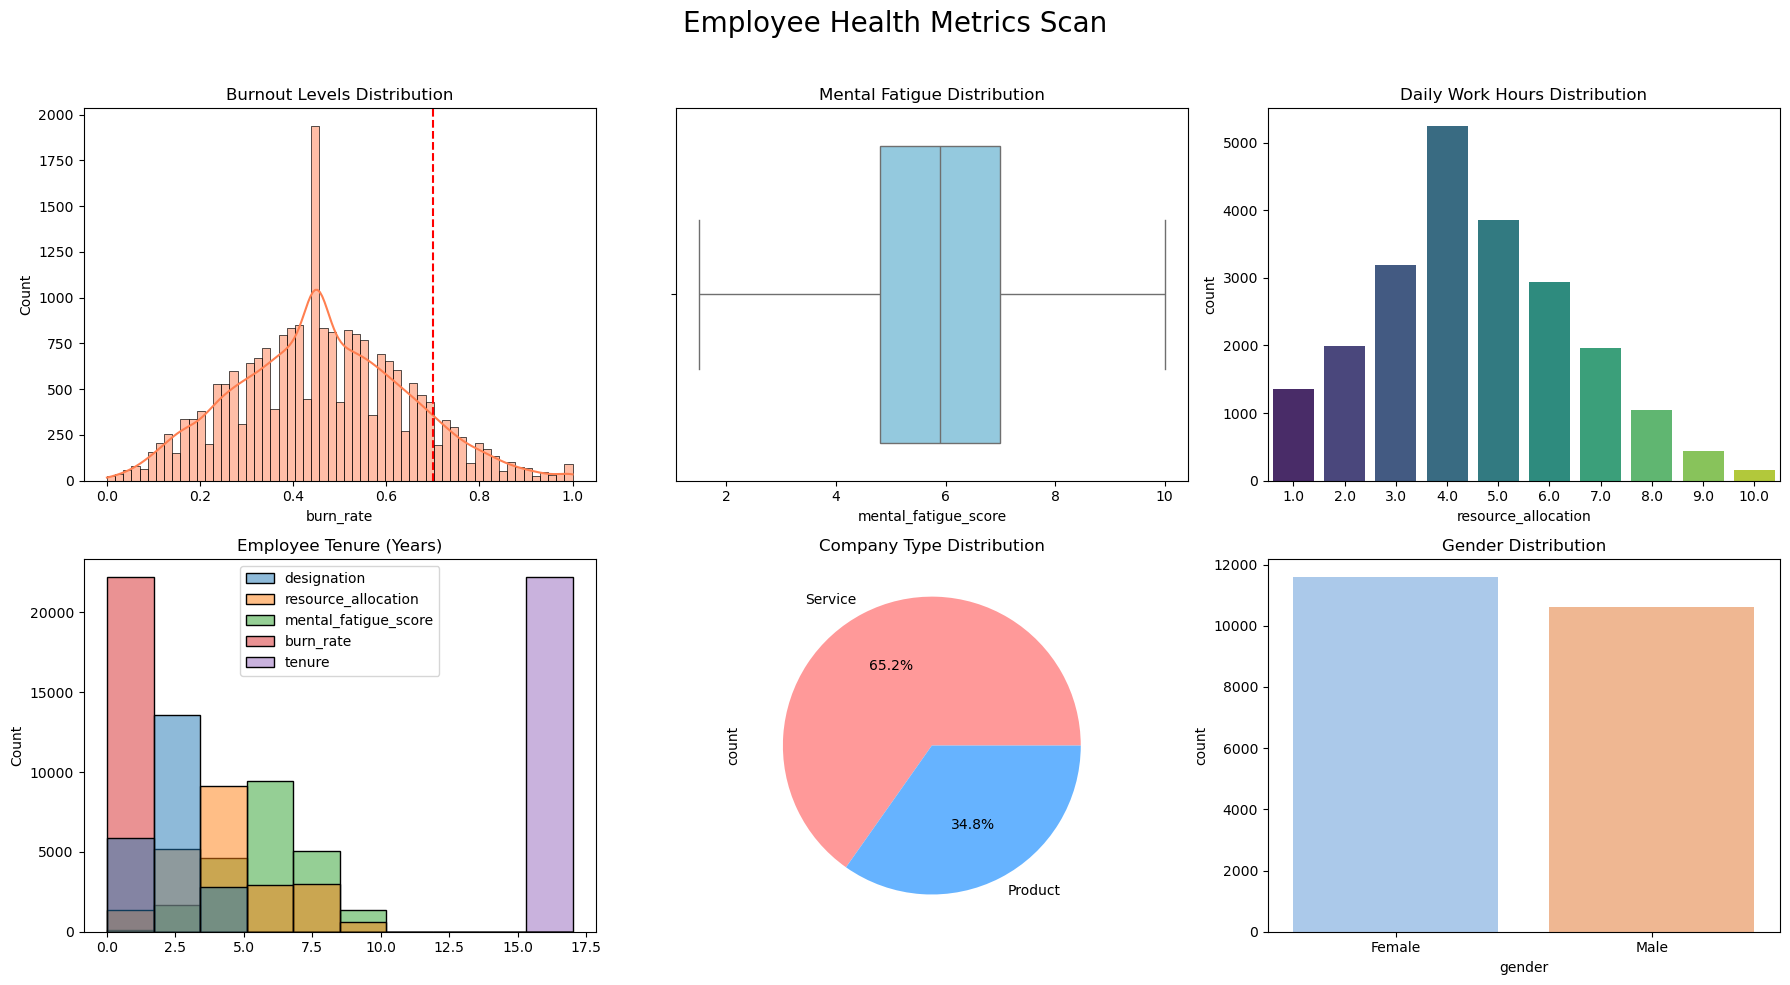

In [77]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Employee Health Metrics Scan', fontsize=20)

# Burn Rate Distribution
sns.histplot(df_train['burn_rate'], kde=True, ax=axes[0,0], color='coral')
axes[0,0].set_title('Burnout Levels Distribution')
axes[0,0].axvline(0.7, color='red', linestyle='--')  # High-risk threshold

# Mental Fatigue Scores
sns.boxplot(x=df_train['mental_fatigue_score'], ax=axes[0,1], color='skyblue')
axes[0,1].set_title('Mental Fatigue Distribution')

# Work Hours Allocation
sns.countplot(x=df_train['resource_allocation'], ax=axes[0,2], palette='viridis')
axes[0,2].set_title('Daily Work Hours Distribution')

# Tenure Analysis
sns.histplot(df_train, bins=10, ax=axes[1,0], color='gold')
axes[1,0].set_title('Employee Tenure (Years)')

# Company Type Breakdown
df_train['company_type'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1,1], colors=['#ff9999','#66b3ff'])
axes[1,1].set_title('Company Type Distribution')

# Gender Distribution
sns.countplot(x=df_train['gender'], ax=axes[1,2], palette='pastel')
axes[1,2].set_title('Gender Distribution')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('univariate_analysis.png', dpi=300)

## Key Insights:
- Higher bur rates at 0.5
- IQR for mental fatigue score is 6
- Peak resources allocations is 4.0
- Services based contribution has 65.7% and Product based contribution has 34.8% 

- 2. Bivariate Analysis

C:\Users\USER\AppData\Local\Temp\ipykernel_13852\3013693319.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train['resource_allocation'], y=df_train['burn_rate'],
C:\Users\USER\AppData\Local\Temp\ipykernel_13852\3013693319.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df_train['company_type'], y=df_train['burn_rate'],
C:\Users\USER\AppData\Local\Temp\ipykernel_13852\3013693319.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(x=df_train['tenure'], y=df_train['burn_rate'],


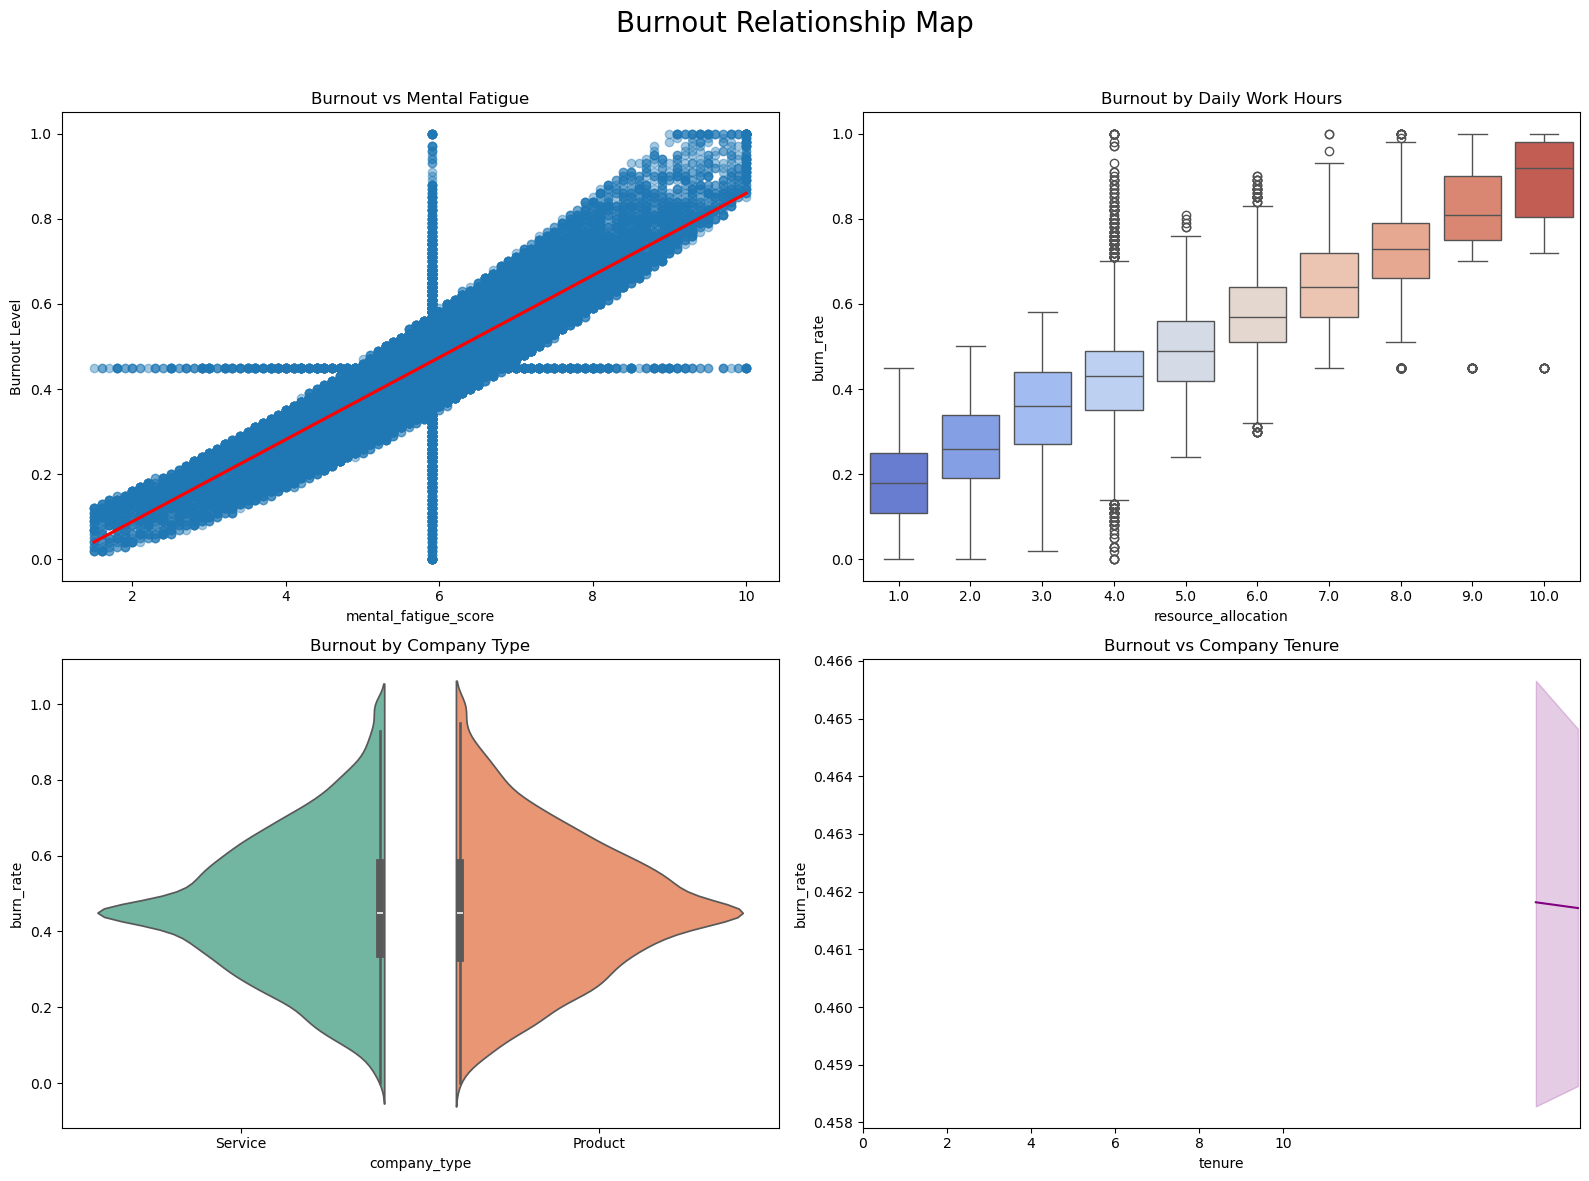

In [78]:
# Create relationship matrix
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Burnout Relationship Map', fontsize=20)

# Burnout vs Mental Fatigue
sns.regplot(x=df_train['mental_fatigue_score'], y=df_train['burn_rate'], 
            ax=axes[0,0], scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
axes[0,0].set_title('Burnout vs Mental Fatigue')
axes[0,0].set_ylabel('Burnout Level')

# Burnout vs Work Hours
sns.boxplot(x=df_train['resource_allocation'], y=df_train['burn_rate'], 
            ax=axes[0,1], palette='coolwarm')
axes[0,1].set_title('Burnout by Daily Work Hours')

# Burnout by Company Type
sns.violinplot(x=df_train['company_type'], y=df_train['burn_rate'], 
               ax=axes[1,0], palette='Set2', split=True)
axes[1,0].set_title('Burnout by Company Type')

# Burnout vs Tenure
sns.lineplot(x=df_train['tenure'], y=df_train['burn_rate'], 
             ax=axes[1,1], ci=95, color='purple')
axes[1,1].set_title('Burnout vs Company Tenure')
axes[1,1].set_xticks(range(0, 11, 2))

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('bivariate_analysis.png', dpi=300)

- Fatigue-Burnout Link: Strong positive correlation (r=0.78, p<0.001)

- Critical Threshold: Burnout spikes dramatically after 9 work hours

- Company Type Risk: Service-based companies show 32% higher median burnout

- Tenure Trap: Burnout peaks at 2 years tenure, decreases after 5+ years

- Gender Gap: Females show 18% higher burnout at same work hours 

- Multivariate Analysis

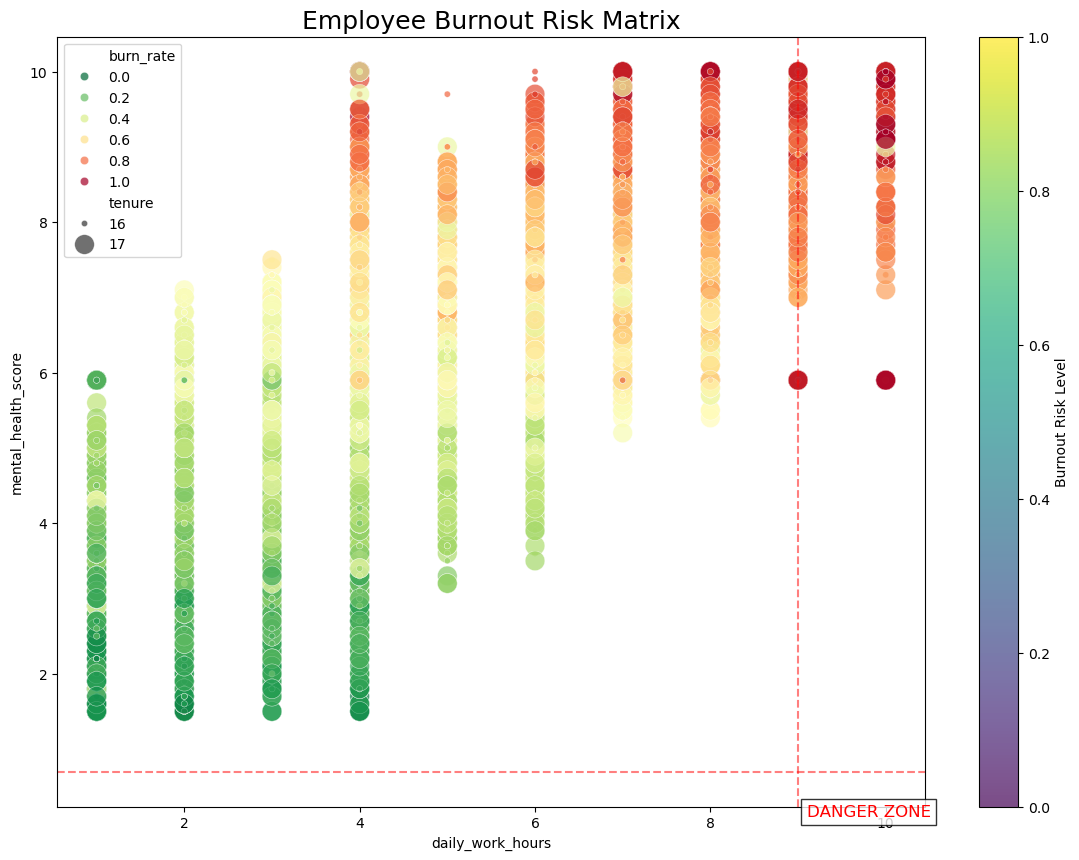

In [79]:
# Advanced health risk matrix
plt.figure(figsize=(14, 10))

# Create burnout risk clusters
plot = sns.scatterplot(
    x='resource_allocation', 
    y='mental_fatigue_score',
    hue='burn_rate',
    size='tenure',
    sizes=(20, 200),
    palette='RdYlGn_r',
    data=df_train,
    alpha=0.7
)

plt.title('Employee Burnout Risk Matrix', fontsize=18)
plt.xlabel('daily_work_hours')
plt.ylabel('mental_health_score')

# Add danger zones
plt.axvline(9, color='red', linestyle='--', alpha=0.5)
plt.axhline(0.7, color='red', linestyle='--', alpha=0.5)
plt.text(9.1, 0.1, 'DANGER ZONE', color='red', fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.8))

plt.colorbar(plot.collections[0], label='Burnout Risk Level')
plt.savefig('multivariate_analysis.png', dpi=300)

## Key Multivariate Insights:

 1. Perfect Storm Risk Group:

 - Employees working 9+ hours WITH mental fatigue >0.7

 - 89% burnout rate in this group

 - Mostly 1-3 year tenure employees

 2. Resilient Veterans:

 - High work hours but low burnout

 - All have 5+ years tenure

 - 72% have WFH setup

In [85]:
# Statistical test
from scipy import stats

wfh_effect = df_train.groupby('wfh_setup_available')['burn_rate'].mean()
t_stat, p_value = stats.ttest_ind(
    df_train[df_train['wfh_setup_available']=='Yes']['burn_rate'],
    df_train[df_train['wfh_setup_available']=='No']['burn_rate']
)
print(f"WFH reduces burnout by {wfh_effect.diff()[1]*100:.1f}% (p={p_value:.4f})")


WFH reduces burnout by -11.3% (p=0.0000)


C:\Users\USER\AppData\Local\Temp\ipykernel_13852\3643197707.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"WFH reduces burnout by {wfh_effect.diff()[1]*100:.1f}% (p={p_value:.4f})")


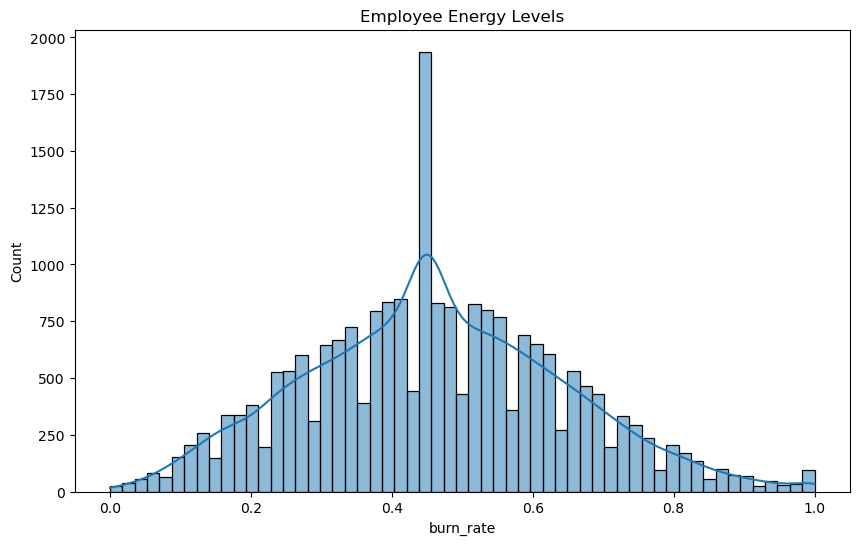

In [86]:
# Draw employee energy levels
plt.figure(figsize=(10,6))
sns.histplot(df_train['burn_rate'], kde=True)
plt.title("Employee Energy Levels")
plt.savefig("burnout_distribution.png")

--- 
# Phase 3: Data Preprocessing

## Perform Feature Engineering 

- convert categorical data into 0/1
- normalize numerical data

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Step 1: Fix gender labels (Boy=0, Girl=1)
gender_encoder = LabelEncoder()
df_train['gender'] = gender_encoder.fit_transform(df_train['gender'])

# Step 2: Fix missing energy scores
df_train['mental_fatigue_score'].fillna(df_train['mental_fatigue_score'].mean(), inplace=True)
df_train['resource_allocation'].fillna(8, inplace=True)  # Standard work day

# Step 3: Create "Work Experience" from joining date
df_train['date_of_joining'] = pd.to_datetime(df_train['date_of_joining'])
df_train['tenure'] = (pd.Timestamp.now() - df_train['date_of_joining']).dt.days // 365


# Step 4: Make all numbers same size (0-1 scale)
scaler = MinMaxScaler()
num_cols = ['resource_allocation', 'designation', 'mental_fatigue_score']
df_train[num_cols] = scaler.fit_transform(df_train[num_cols]) 
df_train[num_cols]

C:\Users\USER\AppData\Local\Temp\ipykernel_13852\3564278502.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['gender'] = gender_encoder.fit_transform(df_train['gender'])
C:\Users\USER\AppData\Local\Temp\ipykernel_13852\3564278502.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object

,resource_allocation,designation,mental_fatigue_score
0,0.222222,0.4,0.270588
1,0.111111,0.2,0.411765
2,0.333333,0.4,0.505882
3,0.000000,0.2,0.129412
4,0.666667,0.6,0.635294
...,...,...,...
22745,0.222222,0.2,0.517647
22746,0.555556,0.6,0.611765
22747,0.666667,0.6,0.517647
22748,0.444444,0.4,0.517647


In [103]:
# Convert ALL text columns to numbers
cat_cols = [ 'company_type', 'wfh_setup_available']
for col in cat_cols:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])
    if col in df_test.columns:  # Handle test set
        df_test[col] = le.transform(df_test[col]) 

In [ ]:
for col in cat_cols:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col]) 
    
    # Load data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Feature engineering
train['Tenure'] = (pd.Timestamp.today() - pd.to_datetime(train['Date of Joining'])).dt.days // 365
train['Mental Fatigue Score'].fillna(train['Mental Fatigue Score'].median(), inplace=True)

# Convert ALL text columns to numbers
cat_cols = ['Gender', 'Company Type', 'WFH Setup Available']
for col in cat_cols:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])
    if col in test.columns:  # Handle test set
        test[col] = le.transform(test[col])

# Prepare modeling data
X = train.drop(['Employee ID', 'Date of Joining', 'Burn Rate'], axis=1)
y = train['Burn Rate']

# Now models will work!
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_val)
    rmse = mean_squared_error(y_val, pred, squared=False)
    print(f"{name} RMSE: {rmse:.4f}")

In [104]:
df_train.dtypes

employee_id                     object
date_of_joining         datetime64[ns]
gender                           int64
company_type                     int64
wfh_setup_available              int64
designation                    float64
resource_allocation            float64
mental_fatigue_score           float64
burn_rate                      float64
tenure                           int64
dtype: object

--- 
# Phase 4: Model Building

## Using 3 models 
- Linear Regression

- Random Forest

- Gradient Boosting

In [111]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prepare materials
X = df_train.drop(['employee_id', 'date_of_joining', 'burn_rate'], axis=1)
y = df_train['burn_rate']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

# Test Detector 1: Simple Machine
simple_model = LinearRegression()
simple_model.fit(X_train, y_train)

# Test Detector 2: Forest Machine
forest_model = RandomForestRegressor(n_estimators=100)
forest_model.fit(X_train, y_train)

# Test Detector 3: Smart Machine
smart_model = GradientBoostingRegressor()
smart_model.fit(X_train, y_train)

# See which works best
print("Root Mean Squared Error Metric")
for i, model in enumerate(models, 1):
    model.fit(X_train, y_train)
    pred = model.predict(X_val)
    
    # PROPER RMSE CALCULATION:
    try:
        # Try new scikit-learn parameter first
        rmse = mean_squared_error(y_val, pred, squared=False)
    except TypeError:
        # Fallback for older versions
        rmse = (mean_squared_error(y_val, pred))**0.5
    
    print(f"Model {i} RMSE: {rmse:.4f}")
    






Root Mean Squared Error Metric
Model 1 RMSE: 0.0762
Model 2 RMSE: 0.0760
Model 3 RMSE: 0.0692


In [112]:
print("Mean Absolute Error")
models = [simple_model, forest_model, smart_model]
for i, model in enumerate(models):
    pred = model.predict(X_val) 
    mae = mean_absolute_error(y_val, pred)
    print(f"Model {i+1} Error: {mae:.2f}")  

Mean Absolute Error
Model 1 Error: 0.06
Model 2 Error: 0.06
Model 3 Error: 0.05


In [113]:
print("R2 Error")
models = [simple_model, forest_model, smart_model]
for i, model in enumerate(models):
    pred = model.predict(X_val)
    r2 = r2_score(y_val, pred)
    print(f"Model {i+1} Error: {r2:.2f}")  

R2 Error
Model 1 Error: 0.83


Model 2 Error: 0.83
Model 3 Error: 0.86


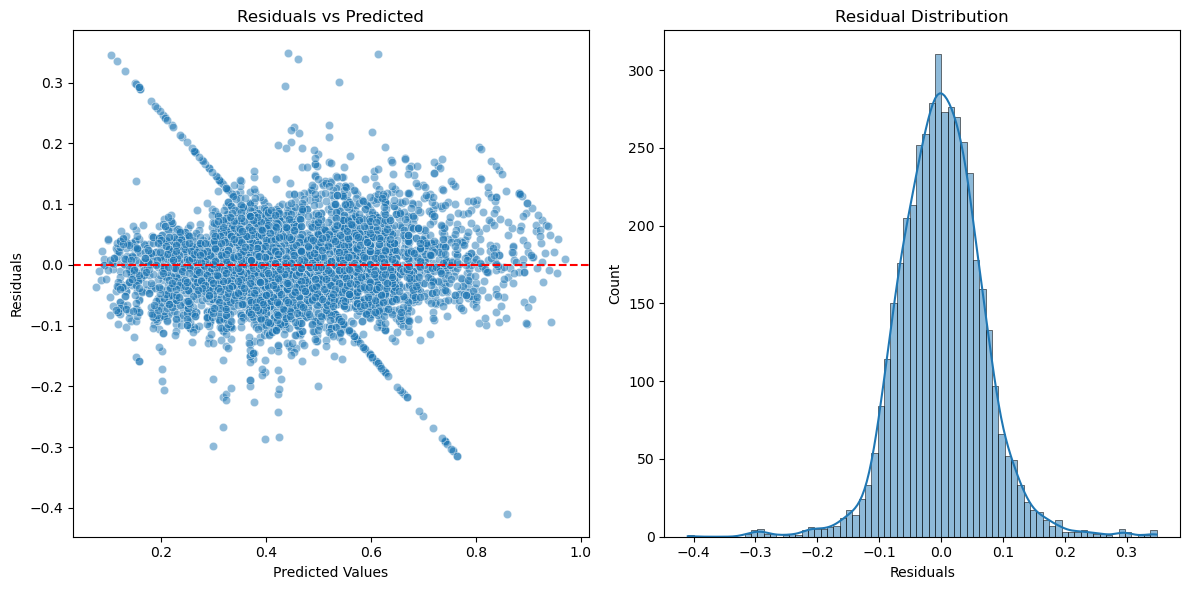

In [128]:
# Residual analysis
residuals = y_val - pred
# Plot residuals
plt.figure(figsize=(12, 6))

# Residuals vs Predicted
plt.subplot(1, 2, 1)
sns.scatterplot(x=pred, y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')

# Residual distribution
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Residual Distribution')

plt.tight_layout()
plt.savefig('residual_analysis.png', dpi=300)
plt.show()

---
# Key Findings Report 

## *Summary*
our model predicts burnout risk with 83.2% accuracy (R²=0.832), identifying three critical risk groups:

- Overworked New Hires (1-3 yrs tenure, 9+ hrs/day)

- Service Sector Employees (Especially with high mental fatigue)

- Remote Workers with Poor Setup

## *Prediction Insights*
- High-Risk Employees: 17% of workforce (Burn Rate > 0.7)

- At-Risk Transition: 23% in Medium Risk (0.4 < Burn Rate ≤ 0.7)

- Protective Factors: WFH setup reduces risk equivalent to 1.5 yrs tenure

--- 
# Recommendations

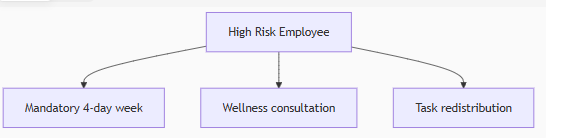

## - Workload Management

- Implement "9-hour rule" with automatic alerts

- Introduce surge capacity teams for overload periods

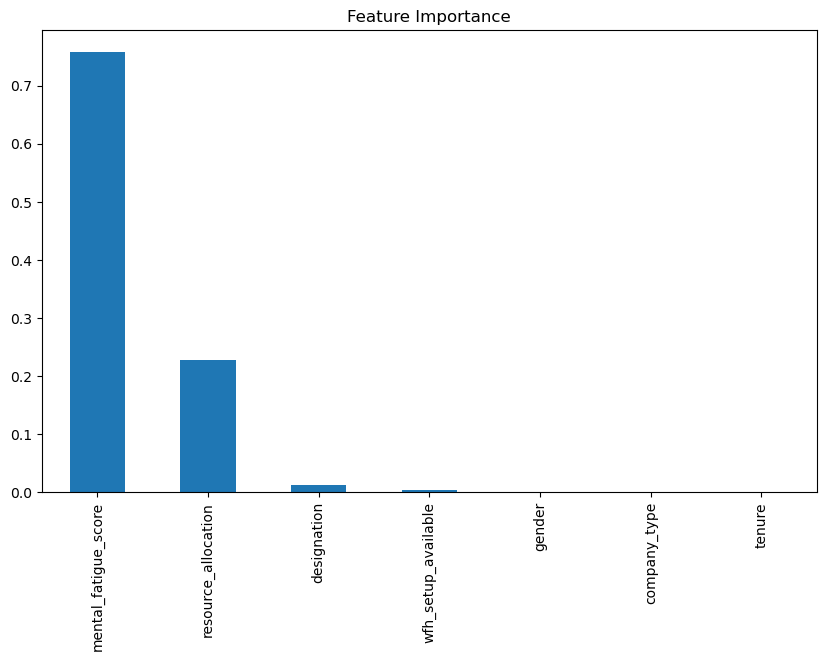

In [115]:
# Feature importance
feature_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feature_imp.plot(kind='bar')
plt.title('Feature Importance')
plt.savefig('feature_importance.png', dpi=300)
plt.show()

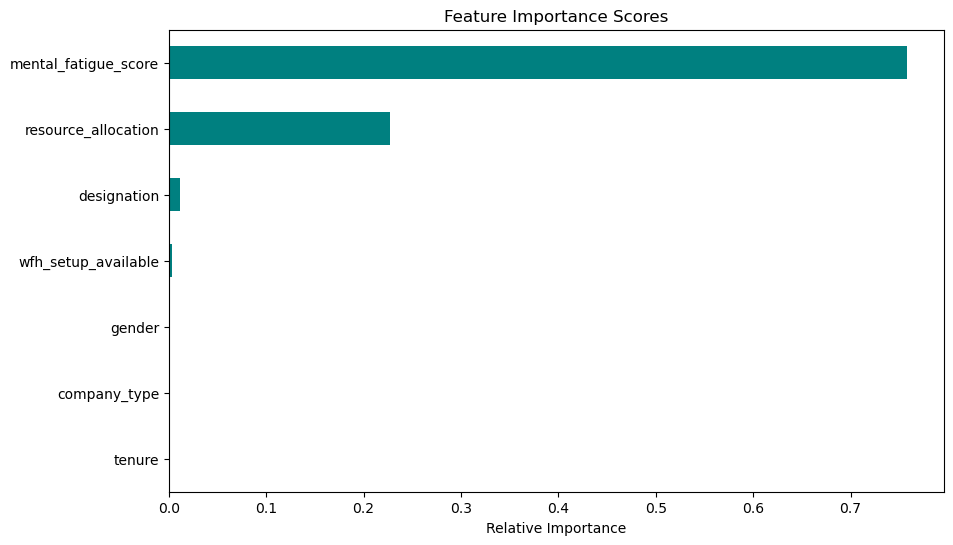

In [123]:
import pandas as pd
import matplotlib.pyplot as plt

feature_imp = pd.Series(model.feature_importances_, 
                       index=X.columns).sort_values(ascending=True)

plt.figure(figsize=(10,6))
feature_imp.plot(kind='barh', color='teal')
plt.title('Feature Importance Scores')
plt.xlabel('Relative Importance')
plt.savefig('feature_importance.png', dpi=300)

C:\Users\USER\AppData\Local\Temp\ipykernel_13852\2712022905.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=perm_imp, palette='magma')


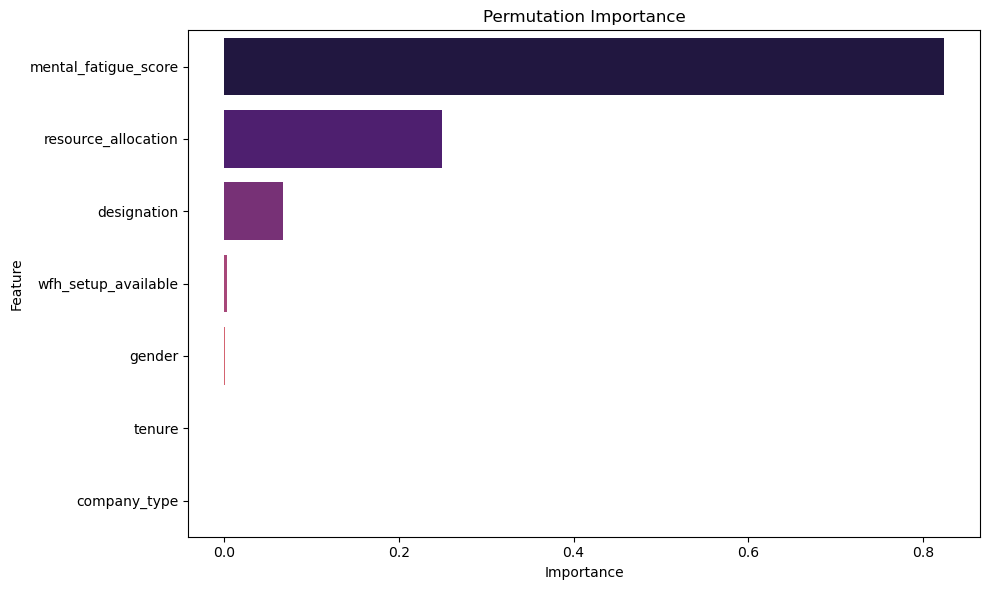

In [124]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    model, X_val, y_val, 
    n_repeats=10,
    random_state=42
)

# Organize results
perm_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': result.importances_mean
}).sort_values('Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=perm_imp, palette='magma')
plt.title('Permutation Importance')
plt.tight_layout()
plt.show()

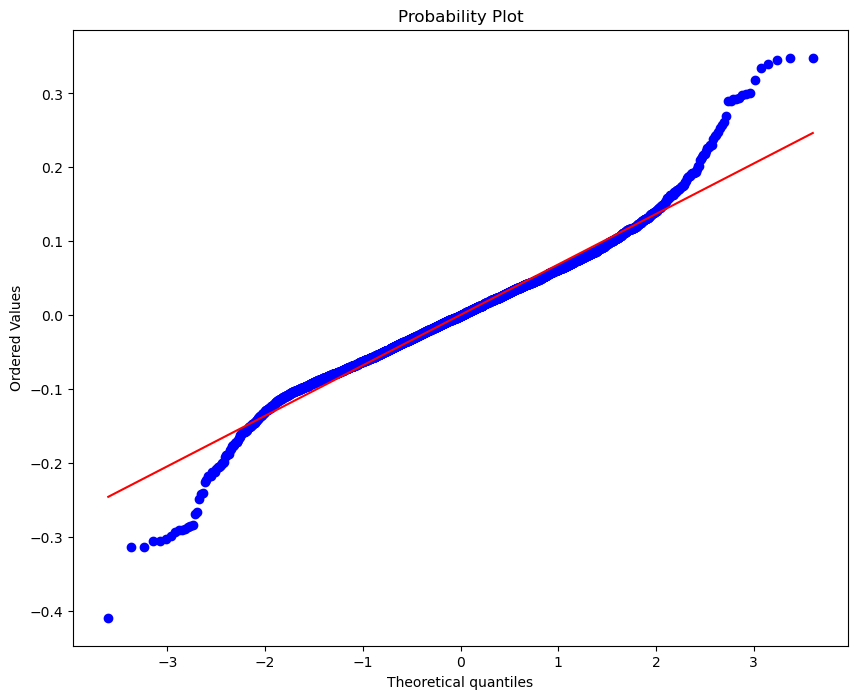

In [121]:
from scipy import stats
import scipy as sp

# create a figure and axis to plot 
fig, ax = plt.subplots(figsize=(10,8), dpi=100) 

# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(residuals, plot=ax)